In [24]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import numpy as np
import matplotlib.pyplot as plt

In [25]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

In [26]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [27]:
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [29]:
print(y_train.shape)
print(y_test.shape)


(50000, 10)
(10000, 10)


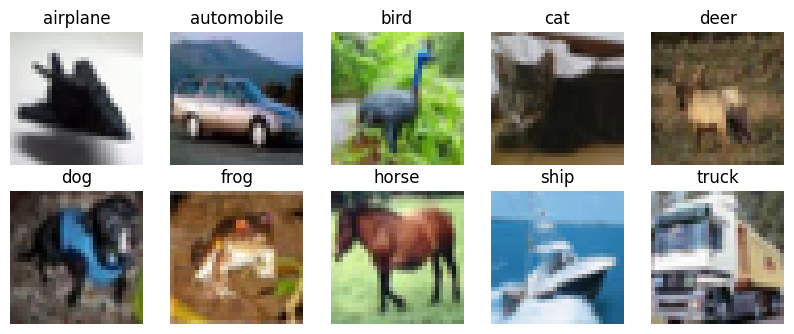

In [31]:
# ✅ class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# ✅ 4. Decode labels (AFTER one-hot) for plotting images
labels_decoded = np.argmax(y_train, axis=1)

# ✅ Show 1 image per class
plt.figure(figsize=(10, 10))
for i in range(10):
    idx = np.where(labels_decoded == i)[0][0]
    plt.subplot(5, 5, i + 1)
    plt.imshow(X_train[idx])
    plt.title(class_names[i])
    plt.axis('off')
plt.show()




In [32]:
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation='relu'),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)                    │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 64)                  │          65,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

In [33]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [34]:
history = model.fit(X_train, y_train, epochs=5,
                    validation_data=(X_test, y_test))

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.4462 - loss: 1.5232 - val_accuracy: 0.5364 - val_loss: 1.3006
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.5892 - loss: 1.1643 - val_accuracy: 0.6061 - val_loss: 1.1111
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.6423 - loss: 1.0139 - val_accuracy: 0.6597 - val_loss: 0.9604
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.6786 - loss: 0.9125 - val_accuracy: 0.6703 - val_loss: 0.9365
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.7068 - loss: 0.8364 - val_accuracy: 0.6810 - val_loss: 0.8979


In [35]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test Loss = ", test_loss)
print("Test Accuracy = ", test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6810 - loss: 0.8979
Test Loss =  0.8979027271270752
Test Accuracy =  0.6809999942779541


In [36]:
import random

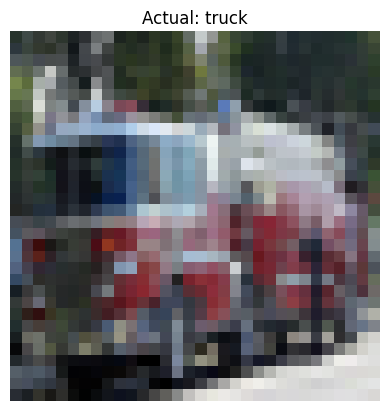

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Predicted Label: truck
Actual Label: truck


In [39]:
# 1. Pick a random image index
idx = random.randint(0, X_test.shape[0] - 1)

# 2. Get the image and label
img = X_test[idx]
true_label = np.argmax(y_test[idx])

# 3. Show the image
plt.imshow(img)
plt.title(f"Actual: {class_names[true_label]}")
plt.axis('off')
plt.show()

# 4. Predict using the trained model
pred = model.predict(img.reshape(1, 32, 32, 3))
pred_label = np.argmax(pred)

# 5. Print prediction result
print("Predicted Label:", class_names[pred_label])
print("Actual Label:", class_names[true_label])